This code loads the MNIST dataset and trains a convolutional neural network on it. The network architecture consists of two convolutional layers with 6 and 16 filters respectively, followed by two average pooling layers, and finally three fully connected layers. The input images are padded to a size of 32x32 and normalized to have pixel values between 0 and 1. The model is trained for 10 epochs using the Adam optimizer and the sparse categorical crossentropy loss function. The test accuracy of the model is evaluated on the test set and printed out.

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
paddings = tf.constant([[0,0], [2,2], [2,2]])
x_train = tf.pad(x_train, paddings, constant_values=0)
x_test = tf.pad(x_test, paddings, constant_values=0)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train, x_test = x_train[..., np.newaxis]/255., x_test[..., np.newaxis]/255.

model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(16, (5,5), activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy = ', test_accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

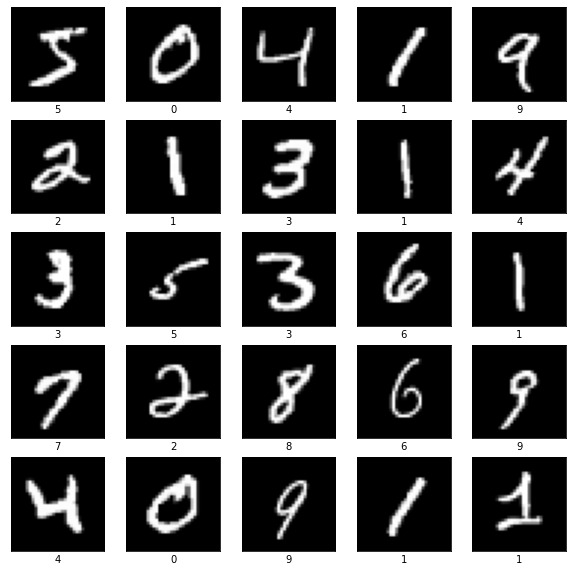

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.reshape(x_train[i], [32,32]), cmap=plt.cm.gray)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
paddings = tf.constant([[0,0], [2,2], [2,2]])
x_train = tf.pad(x_train, paddings, constant_values=0)
x_test = tf.pad(x_test, paddings, constant_values=0)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train, x_test = x_train[..., np.newaxis]/255., x_test[..., np.newaxis]/255.

model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,1)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy = ', test_accuracy)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 200)               205000    
                                                                 
 dense_10 (Dense)            (None, 10)                2010      
                                                                 
Total params: 207,010
Trainable params: 207,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2402 - accuracy: 0.9295
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1023 - accuracy: 0.9694
313/313 - 1s - loss: 0.0885 - accuracy: 0.9730 - 661ms/epoch - 2ms/step
Test accuracy =  0.97299998998641

In [14]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train, x_test = x_train/255., x_test/255.

model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy = ', test_accuracy)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 200)               614600    
                                                                 
 dense_12 (Dense)            (None, 10)                2010      
                                                                 
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9032 - accuracy: 0.3155
Epoch 2/2
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7282 - accuracy: 0.3862
313/313 - 1s - loss: 1.7256 - accuracy: 0.3728 - 650ms/epoch - 2ms/step
Test accuracy =  0.372799992561

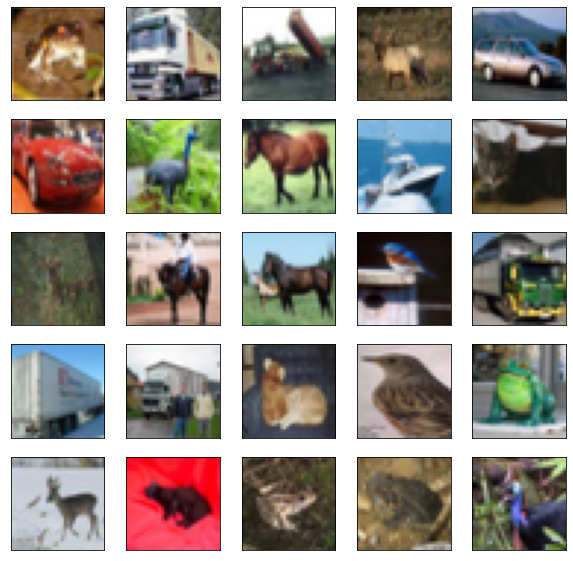

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # plt.xlabel(class_names[y_train[i]])
plt.show()

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train, x_test = x_train/255., x_test/255.

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy = ', test_accuracy)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             